# Accessing the KEGG database

In [11]:
import biu as biu
import matplotlib.pylab as plt

where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

kegg = biu.db.KEGG()
hms = biu.maps.HumanS()

D: Initializing the SQLiteResourceManager object NOW


In [8]:
print(kegg)

KEGG object
 Where: /exports/molepi/tgehrmann/data
 Version: human
 Objects:
  * [ ] _orgMap
  * [ ] _featureData
 Files:
  * [X] org_map : /exports/molepi/tgehrmann/data/kegg_human/org_map.tsv
  * [ ] feature_data : /exports/molepi/tgehrmann/data/kegg_human/feature_data.sqlite



## Get a list of pathways and genes

In [16]:
print("Number of pathways: %d" % len(kegg.getPathways()))
print("Number of genes: %d" % len(kegg.getGenes()))

Number of pathways: 325
Number of genes: 7373


## Get the pathways that a specific gene is in
Look up with the geneID

In [13]:
print("Number of pathways MTOR is in: %d" % len(kegg.getGenePathways(hms.getSymbolGeneID("MTOR")[0])))

Number of pathways MTOR is in: 37


## Get the genes in a pathway
Lookup with KEGG pathway ID

In [14]:
print("Number of genes in path:hsa05230: %d" % len(kegg.getPathwayGenes("path:hsa05230")))

Number of genes in path:hsa05230: 65


## Get information about a specific KEGG pathway

In [9]:
print(kegg.getPathwayInfo("hsa05230"))

D: Initializing the SQLDictResourceManager object NOW
D: Downloading via REST from 'http://rest.kegg.jp/get/path:hsa05230'


ENTRY       hsa05230                    Pathway
NAME        Central carbon metabolism in cancer - Homo sapiens (human)
DESCRIPTION Malignant transformation of cells requires specific adaptations of cellular metabolism to support growth and survival. In the early twentieth century, Otto Warburg established that there are fundamental differences in the central metabolic pathways operating in malignant tissue. He showed that cancer cells consume a large amount of glucose, maintain high rate of glycolysis and convert a majority of glucose into lactic acid even under normal oxygen concentrations (Warburg's Effects). More recently, it has been recognized that the 'Warburg effect' encompasses a similarly increased utilization of glutamine. From the intermediate molecules provided by enhanced glycolysis and glutaminolysis, cancer cells synthesize most of the macromolecules required for the duplication of their biomass and genome. These cancer-specific alterations represent a major consequence 

## Make a pretty plot

D: Initializing the TSVMapResourceManager object NOW
D: Loading the index from pickle


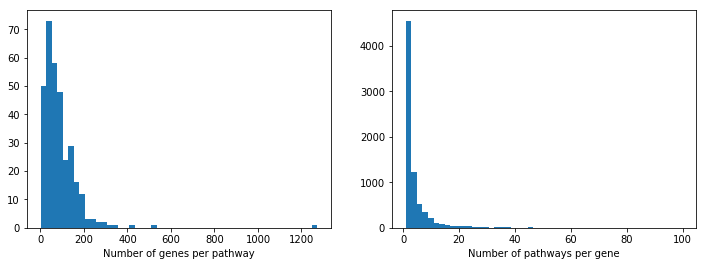

In [12]:
fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

# How many genes are there per kegg pathway?
genesPerPathway = [ len(kegg.getPathwayGenes(p)) for p in kegg.getPathways() ]
pathwaysPerGene = [ len(kegg.getGenePathways(g)) for g in kegg.getGenes() ]

axes[0].hist(genesPerPathway, bins=50)
axes[0].set_xlabel("Number of genes per pathway")
axes[1].hist(pathwaysPerGene, bins=50)
axes[1].set_xlabel("Number of pathways per gene")
plt.show()